In [1]:
import os
import gpxpy.gpx
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt
from fitparse import FitFile

In command line unzipped the files in the activities folder using:

gzip -d *.gz

In [8]:
fit_files = [x for x in os.listdir('../data/MB_Strava/activities') if x.endswith(".fit.gz")]
gpx_files = [x for x in os.listdir('../data/MB_Strava/activities') if x.endswith(".gpx")]

In [14]:
def semicir_to_degs(semicirc):
    return semicirc * (180 / 2**31)

def read_fitfile(filename):
    try:
        fitfile = FitFile(gzip.open(filename))
        df = pd.DataFrame([{d['name']: d['value'] for d in r.as_dict()['fields']} 
                                   for r in fitfile.get_messages('record')])
        df['position_lat'] = df['position_lat'].map(semicir_to_degs)
        df['position_long'] = df['position_long'].map(semicir_to_degs)
        df.set_index("timestamp", inplace=True)
        return df
    except Exception as e:
        print(e)
        

In [16]:
onerec_df = read_fitfile('../data/MB_Strava/activities/4469887026.fit.gz')
onerec_df.drop('unknown_88', axis=1)

,position_lat,position_long,distance,enhanced_speed,speed,heart_rate,cadence
timestamp,,,,,,,
2020-10-10 11:01:27,39.497363,-106.136233,1.18,1.362,1.362,92,83
2020-10-10 11:01:28,39.497366,-106.136222,2.09,1.076,1.076,92,0
2020-10-10 11:01:29,39.497361,-106.136211,2.70,1.116,1.116,92,0
2020-10-10 11:01:30,39.497363,-106.136191,4.41,1.358,1.358,92,0
2020-10-10 11:01:31,39.497365,-106.136169,6.28,1.547,1.547,92,0
...,...,...,...,...,...,...,...
2020-10-10 12:42:04,39.494008,-106.112020,6778.54,1.295,1.295,120,58
2020-10-10 12:42:05,39.493999,-106.112010,6779.87,1.296,1.296,119,56
2020-10-10 12:42:06,39.493994,-106.112003,6780.65,1.279,1.279,116,55


# Work on gpx files (only started)

In [20]:
gpx = gpxpy.parse(open('../data/KM_Strava/activities/4970268800.gpx'))
track_coords = [[point.latitude, point.longitude, point.elevation] 
                            for track in gpx.tracks 
                                for segment in track.segments 
                                    for point in segment.points]
pd.DataFrame(track_coords, columns=['Latitude', 'Longitude', 'Elevation'])

,Latitude,Longitude,Elevation
0,39.567243,-106.085998,2783.8
1,39.566986,-106.085617,2784.2
2,39.566976,-106.085576,2784.2
3,39.566967,-106.085535,2784.2
4,39.567041,-106.085516,2784.3
...,...,...,...
5101,39.569587,-106.097693,2772.6
5102,39.569587,-106.097693,2772.6
5103,39.569587,-106.097693,2772.6
5104,39.569587,-106.097693,2772.6


In [ ]:
#track_coords

In [ ]:
# for track in gpx.tracks:
#     for segment in track.segments:
#         for point in segment.points:
#             print(point)

In [ ]:
#gpx.tracks[0].segments[0].points

In [21]:
#ignore
gpx_track = gpx.tracks[0]
print("Name: " + gpx_track.name)
print("Description: " + str(gpx_track.description))
print("Start: " + str(gpx_track.get_time_bounds().start_time.isoformat()))
print("End: " + str(gpx_track.get_time_bounds().end_time))
 
bounds = gpx_track.get_bounds()
print("Latitude Bounds: (%f, %f)" % (bounds.min_latitude, bounds.max_latitude))
print("Longitude Bounds: (%f, %f)" % (bounds.min_longitude, bounds.max_longitude))
print("Duration: ", gpx_track.get_duration())

Name: Daycare commute
Description: None
Start: 2021-03-18T23:01:47+00:00
End: 2021-03-19 00:26:58+00:00
Latitude Bounds: (39.564648, 39.577861)
Longitude Bounds: (-106.098048, -106.051350)
Duration:  5111.0


# Investigating activities dataframe

### KM Activities = 1566 activities, 15 different types of activities

In [118]:
df = pd.read_csv('../data/KM_Strava/activities.csv')
parsed_activities = df.iloc[:,(df.isnull().sum(axis = 0) <= 500).values].set_index('Activity Date')
len(parsed_activities)

1554

In [119]:
parsed_activities.tail(2)

,Activity ID,Activity Name,Activity Type,Elapsed Time,Distance,Commute,Filename,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Elevation Gain,Elevation Low,Elevation High,Max Grade,Average Grade,Commute.1
Activity Date,,,,,,,,,,,,,,,,,
"Mar 19, 2021, 3:39:43 PM",4974369592,Crystal Exploring,Backcountry Ski,12409,10.22,False,activities/4974369592.gpx,12409.0,9266,10226.099610,9.3,995.585998,3104.000000,3697.800049,50.000000,0.048894,0.0
"Mar 23, 2021, 8:22:20 PM",4999211531,🎿 👎 🪂 👍 ⛷,Backcountry Ski,8935,8.04,False,activities/4999211531.gpx,8935.0,6127,8042.100098,9.1,803.637390,2772.399902,3559.500000,48.599998,-0.036060,0.0


In [120]:
parsed_activities['Activity Type'].unique()

array(['Ride', 'Run', 'Hike', 'Backcountry Ski', 'Walk', 'Nordic Ski',
       'Workout', 'Windsurf', 'Surfing', 'Canoe', 'Rock Climb',
       'Kitesurf', 'Alpine Ski', 'Kayaking', 'Stand Up Paddling'],
      dtype=object)

In [121]:
len(parsed_activities['Activity Type'].unique())

15

Text(0.5, 1.0, 'User1 Activity Breakdown')

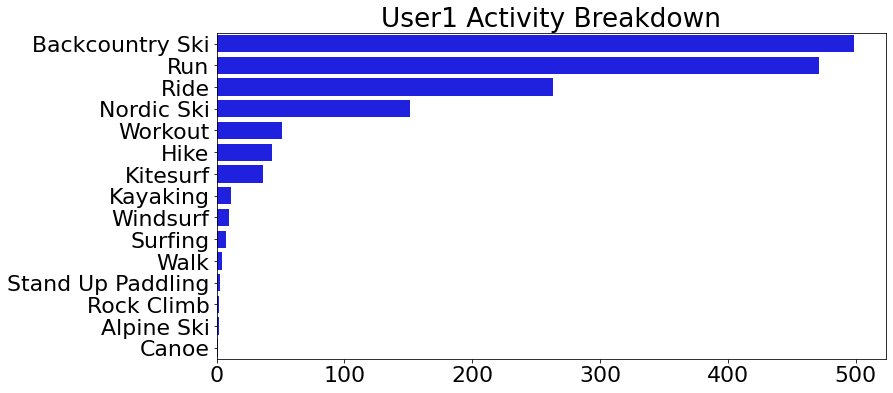

In [123]:
activity_count = parsed_activities['Activity Type'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.barplot(y=activity_count.index, x=activity_count.values, ax=ax, color='blue')
ax.set_title('User1 Activity Breakdown')

### BL Activities = 2406 activities, 19 different types of activities

In [27]:
df = pd.read_csv('../data/BL_Strava/activities.csv')
parsed_activities = df.iloc[:,(df.isnull().sum(axis = 0) <= 500).values].set_index('Activity Date')
len(parsed_activities)

2394

In [28]:
parsed_activities['Activity Type'].unique()

array(['Ride', 'Run', 'Hike', 'Walk', 'Nordic Ski', 'Backcountry Ski',
       'Crossfit', 'Stand Up Paddling', 'Canoe', 'Kayaking', 'Swim',
       'Rock Climb', 'Alpine Ski', 'Snowshoe', 'Workout', 'Water Sport',
       'Surfing', 'Weight Training'], dtype=object)

In [29]:
len(parsed_activities['Activity Type'].unique())

18

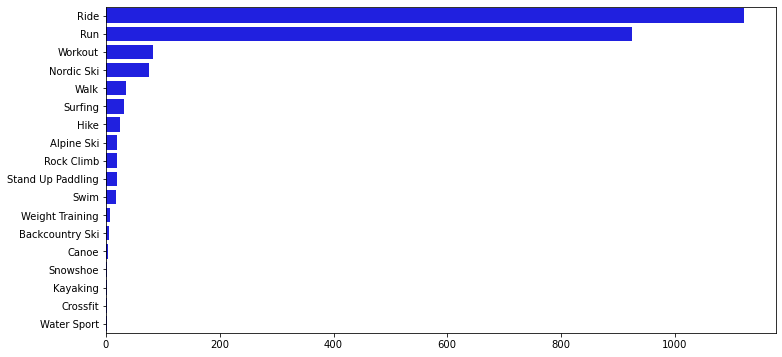

In [30]:
activity_count = parsed_activities['Activity Type'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
_ = sns.barplot(y=activity_count.index, x=activity_count.values, ax=ax, color='blue')

# Example of a driveaway

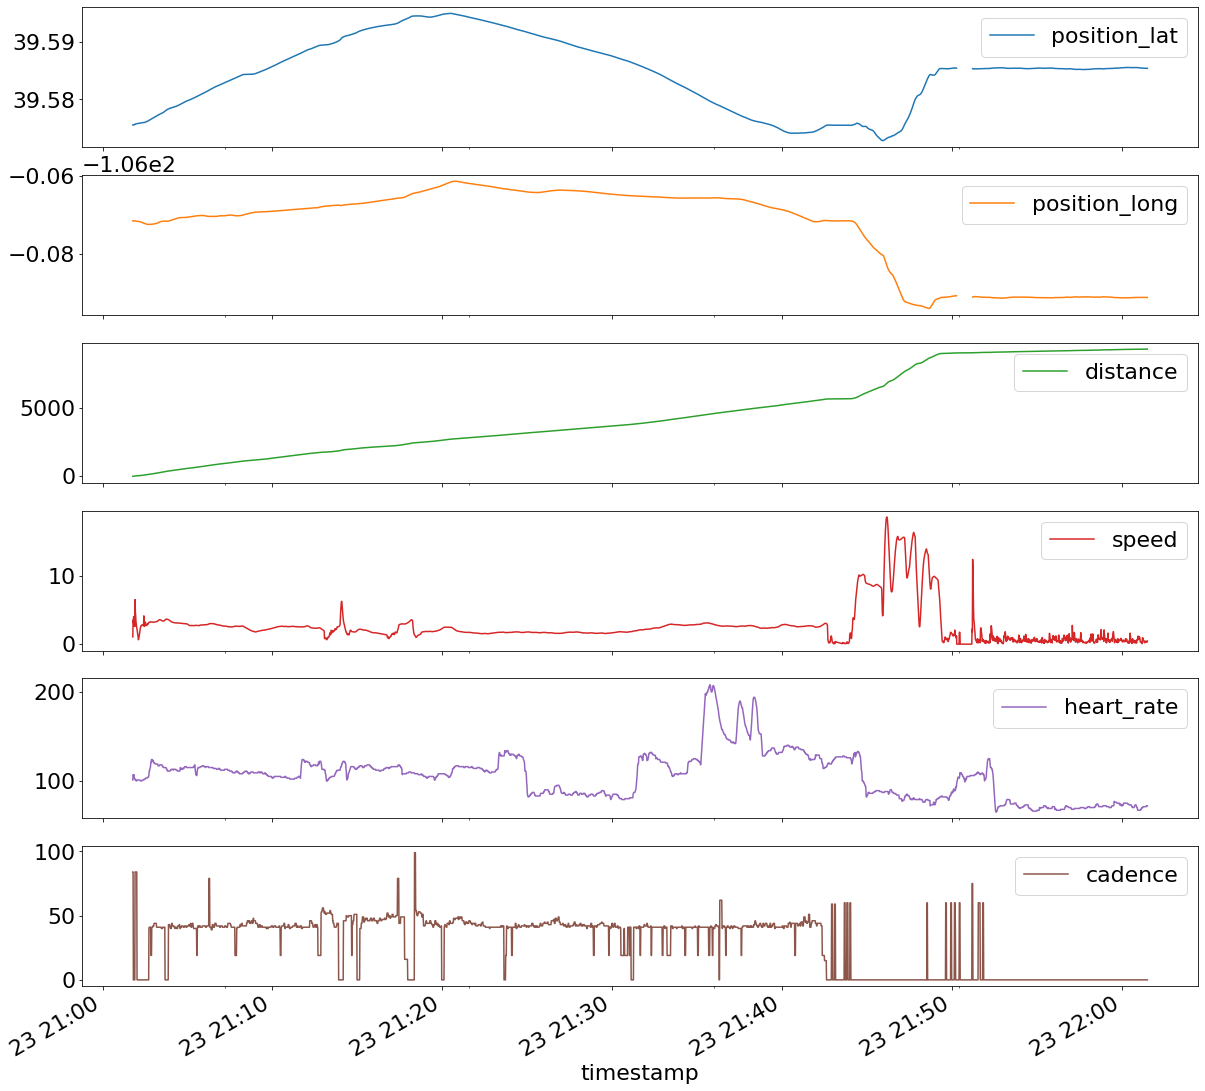

In [42]:
def read_file(filename):
    try:
        fitfile = FitFile(filename)
        df = pd.DataFrame([{d['name']: d['value'] for d in r.as_dict()['fields']} 
                                   for r in fitfile.get_messages('record')])
        df['position_lat'] = df['position_lat'].map(semicir_to_degs)
        df['position_long'] = df['position_long'].map(semicir_to_degs)
        df.set_index("timestamp", inplace=True)
        return df
    except Exception as e:
        print(e)

plt.rcParams.update({'font.size': 22})

_ = read_file('../data/MB_Strava/activities/driveaway.fit')[['position_lat', 
                'position_long','distance', 'speed', 'heart_rate', 'cadence']].plot(figsize=(20,20), subplots=True)



In [112]:
df = pd.read_csv('../data/LB_Strava/activities.csv')
parsed_activities = df.iloc[:,(df.isnull().sum(axis = 0) <= 100).values].set_index('Activity Date')
#len(parsed_activities)

In [114]:
tmp = parsed_activities.query("Filename=='activities/1839577269.fit.gz'")
#tmp.loc[93, 'Activity_Name']='HikeRun'
a = tmp.drop(columns=['Distance.1', 'Commute.1', 'Elapsed Time.1'], axis=1)
a['Activity Name'] = 'Morning Hike'
a

,Activity ID,Activity Name,Activity Type,Elapsed Time,Distance,Commute,Filename,Moving Time,Max Speed,Elevation Gain,Elevation Low,Elevation High,Max Grade,Average Grade,Average Temperature
Activity Date,,,,,,,,,,,,,,,
"Jul 19, 2018, 11:54:08 AM",1714403192,Morning Hike,Hike,43352,44.33,False,activities/1839577269.fit.gz,38527,3.4,2287.0,2934.600098,3748.199951,43.299999,0.02481,24.0


In [115]:
a.to_markdown()

'| Activity Date             |   Activity ID | Activity Name   | Activity Type   |   Elapsed Time |   Distance | Commute   | Filename                     |   Moving Time |   Max Speed |   Elevation Gain |   Elevation Low |   Elevation High |   Max Grade |   Average Grade |   Average Temperature |\n|:--------------------------|--------------:|:----------------|:----------------|---------------:|-----------:|:----------|:-----------------------------|--------------:|------------:|-----------------:|----------------:|-----------------:|------------:|----------------:|----------------------:|\n| Jul 19, 2018, 11:54:08 AM |    1714403192 | Morning Hike    | Hike            |          43352 |      44.33 | False     | activities/1839577269.fit.gz |         38527 |         3.4 |             2287 |          2934.6 |           3748.2 |        43.3 |       0.0248099 |                    24 |'

In [91]:
import numpy as np
idx = np.argsort(parsed_activities['Elevation Gain'])[::-1]
parsed_activities.iloc[idx[2]]


Activity ID                              1714403192
Activity Name             Hike - The Four Pass Loop
Activity Type                                  Hike
Elapsed Time                                  43352
Distance                                      44.33
Commute                                       False
Filename               activities/1839577269.fit.gz
Elapsed Time.1                              43352.0
Moving Time                                   38527
Distance.1                              44337.19922
Max Speed                                       3.4
Elevation Gain                               2287.0
Elevation Low                           2934.600098
Elevation High                          3748.199951
Max Grade                                 43.299999
Average Grade                               0.02481
Average Temperature                            24.0
Commute.1                                       0.0
Name: Jul 19, 2018, 11:54:08 AM, dtype: object

In [116]:
135+2394+1555+553+384

5021